In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/dataset.csv')

In [ ]:
df.head()

,timestamp,Apple,Amazon,Salesforce,CVS,Facebook,Google,IBM,Coca-Cola,Pfizer,UPS
0,2015-02-26 21:42:53,104,57.0,11,0.0,53.0,35.0,7.0,8.0,3.0,2.0
1,2015-02-26 21:47:53,100,43.0,10,0.0,64.0,41.0,4.0,8.0,2.0,2.0
2,2015-02-26 21:52:53,99,55.0,3,0.0,49.0,32.0,14.0,5.0,2.0,4.0
3,2015-02-26 21:57:53,154,64.0,4,0.0,48.0,36.0,6.0,13.0,36.0,3.0
4,2015-02-26 22:02:53,120,93.0,9,0.0,22.0,32.0,1.0,22.0,8.0,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15902 entries, 0 to 15901
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   15902 non-null  object 
 1   Apple       15902 non-null  int64  
 2   Amazon      15831 non-null  float64
 3   Salesforce  15902 non-null  int64  
 4   CVS         15853 non-null  float64
 5   Facebook    15833 non-null  float64
 6   Google      15842 non-null  float64
 7   IBM         15893 non-null  float64
 8   Coca-Cola   15851 non-null  float64
 9   Pfizer      15858 non-null  float64
 10  UPS         15866 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 1.3+ MB


In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15831 entries, 0 to 15830
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   15831 non-null  object 
 1   Apple       15831 non-null  int64  
 2   Amazon      15831 non-null  float64
 3   Salesforce  15831 non-null  int64  
 4   CVS         15831 non-null  float64
 5   Facebook    15831 non-null  float64
 6   Google      15831 non-null  float64
 7   IBM         15831 non-null  float64
 8   Coca-Cola   15831 non-null  float64
 9   Pfizer      15831 non-null  float64
 10  UPS         15831 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
anomaly_inputs=['Apple','Amazon']

In [ ]:
model_IF=IsolationForest(contamination=0.1,random_state=20)

In [ ]:
model_IF.fit(df[anomaly_inputs])

IsolationForest(contamination=0.1, random_state=20)

In [ ]:
df['scores']=model_IF.decision_function(df[anomaly_inputs])
df['anomaly_inputs']=model_IF.predict(df[anomaly_inputs])

In [ ]:
df.loc[:,['Apple','Amazon','scores','anomaly_inputs']]

,Apple,Amazon,scores,anomaly_inputs
0,104,57.0,0.089121,1
1,100,43.0,0.088776,1
2,99,55.0,0.099155,1
3,154,64.0,0.043797,1
4,120,93.0,-0.009765,-1
...,...,...,...,...
15826,67,51.0,0.126372,1
15827,77,54.0,0.118567,1
15828,57,46.0,0.129038,1
15829,116,56.0,0.080216,1


In [ ]:
anomaly_inputs = ['Apple', 'Amazon']
y_pred = model_IF.predict(df[anomaly_inputs])
anomaly_indices = y_pred == -1
df[anomaly_indices]

,timestamp,Apple,Amazon,Salesforce,CVS,Facebook,Google,IBM,Coca-Cola,Pfizer,UPS,scores,anomaly_inputs
4,2015-02-26 22:02:53,120,93.0,9,0.0,22.0,32.0,1.0,22.0,8.0,5.0,-0.009765,-1
5,2015-02-26 22:07:53,90,104.0,2,0.0,23.0,25.0,9.0,17.0,4.0,1.0,-0.017518,-1
8,2015-02-26 22:22:53,339,57.0,5,0.0,23.0,38.0,9.0,10.0,2.0,8.0,-0.072833,-1
13,2015-02-26 22:47:53,245,79.0,2,0.0,41.0,31.0,11.0,8.0,1.0,5.0,-0.050841,-1
60,2015-02-27 02:42:53,51,102.0,2,1.0,85.0,73.0,6.0,6.0,0.0,4.0,-0.002151,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15783,2015-04-22 16:57:53,191,99.0,4,1.0,40.0,65.0,11.0,23.0,2.0,9.0,-0.060408,-1
15803,2015-04-22 18:37:53,59,115.0,5,2.0,43.0,87.0,7.0,23.0,1.0,3.0,-0.042734,-1
15820,2015-04-22 20:02:53,257,40.0,12,1.0,298.0,106.0,10.0,23.0,1.0,2.0,-0.039980,-1
15821,2015-04-22 20:07:53,838,38.0,4,0.0,210.0,86.0,6.0,23.0,2.0,3.0,-0.202668,-1


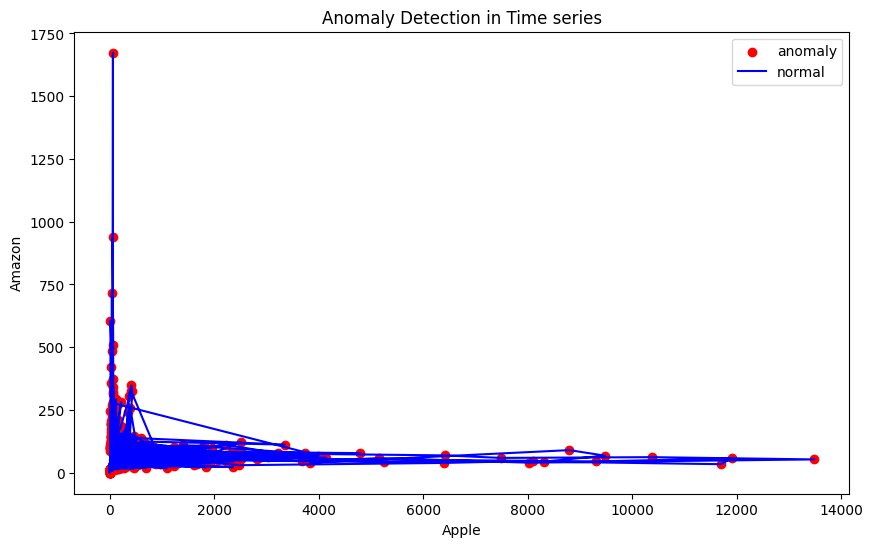

Number of Anomalies:
                 timestamp  Apple  Amazon  Salesforce  CVS  Facebook  Google  \
4      2015-02-26 22:02:53    120    93.0           9  0.0      22.0    32.0   
5      2015-02-26 22:07:53     90   104.0           2  0.0      23.0    25.0   
8      2015-02-26 22:22:53    339    57.0           5  0.0      23.0    38.0   
13     2015-02-26 22:47:53    245    79.0           2  0.0      41.0    31.0   
60     2015-02-27 02:42:53     51   102.0           2  1.0      85.0    73.0   
...                    ...    ...     ...         ...  ...       ...     ...   
15783  2015-04-22 16:57:53    191    99.0           4  1.0      40.0    65.0   
15803  2015-04-22 18:37:53     59   115.0           5  2.0      43.0    87.0   
15820  2015-04-22 20:02:53    257    40.0          12  1.0     298.0   106.0   
15821  2015-04-22 20:07:53    838    38.0           4  0.0     210.0    86.0   
15824  2015-04-22 20:22:53    317    76.0          20  0.0     179.0    54.0   

        IBM  Coca-

In [ ]:
anomaly_indices = df[df['anomaly_inputs'] == -1]
plt.figure(figsize=(10,6))
plt.scatter(anomaly_indices['Apple'],anomaly_indices['Amazon'],color='red',label='anomaly')
plt.plot(df['Apple'],df['Amazon'],color='blue',label='normal')
plt.title('Anomaly Detection in Time series')
plt.xlabel('Apple')
plt.ylabel('Amazon')
plt.legend()
plt.show()
print("Number of Anomalies:")
print(anomaly_indices)